In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
# Step 1: Read the file "Disney_movies.csv" and create the data frame.
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/disney-movies/Disney_movies.csv")


In [25]:
# Step 2: Calculate the basic statistics of each variable.
basic_statistics = df.describe()

# Display the result
print("Basic statistics of each variable:")
print(basic_statistics)

Basic statistics of each variable:
       Unnamed: 0  Box office(Milion)
count  115.000000        1.150000e+02
mean    57.000000        2.319950e+06
std     33.341666        5.406789e+06
min      0.000000        1.000000e+00
25%     28.500000        3.750000e+00
50%     57.000000        3.300000e+01
75%     85.500000        2.101504e+06
max    114.000000        2.806822e+07


In [24]:
# Step 3: Get the summary of the data count for Hit, Mid, and Flop movies.

movie_counts = df['SuccessCategory'].value_counts()

# Display the result

print("Summary of data count for Hit, Mid, and Flop movies:")
print(movie_counts)

Summary of data count for Hit, Mid, and Flop movies:
SuccessCategory
Flop    70
Hit     43
Mid      2
Name: count, dtype: int64


In [26]:
# Step 4: Calculate the number of missing values in each variable (Column)

missing_values_count = df.isnull().sum()

# Display the result

print("Number of missing values in each variable (column):")
print(missing_values_count)

Number of missing values in each variable (column):
Unnamed: 0             0
movie_name             0
Produced by            2
Music by               0
Productioncompany      0
Running time           0
Country               13
Language               5
Budget(Milion)        74
Box office(Milion)     0
SuccessCategory        0
dtype: int64


In [27]:
# Step 5: Suggest the best-suited cleaning method among Forward filling, Backward filling, and Interpolate methods to fill the missing values.
# Let's use interpolation to fill missing values for numeric columns

df_interpolated = df.interpolate(method='linear')

# Print the decision

print("The best-suited cleaning method among Forward filling, Backward filling, and Interpolate methods is Interpolation.")

# Display the DataFrame after filling missing values

print("DataFrame after filling missing values:")
print(df_interpolated)

The best-suited cleaning method among Forward filling, Backward filling, and Interpolate methods is Interpolation.
DataFrame after filling missing values:
     Unnamed: 0                                   movie_name  \
0             0  Snow White and the Seven Dwarfs (1937 film)   
1             1                        Pinocchio (1940 film)   
2             2                         Fantasia (1940 film)   
3             3             The Reluctant Dragon (1941 film)   
4             4                                        Dumbo   
..          ...                                          ...   
110         110                       Robin Hood (1973 film)   
111         111                                     Superdad   
112         112                           Herbie Rides Again   
113         113                              The Bears and I   
114         114                          The Castaway Cowboy   

                          Produced by  \
0                     ['Walt Disney

/tmp/ipykernel_33/3099302083.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear')


In [28]:
# Step 6: Calculate the number of missing values in each variable (Column) again to check whether there are any missing values remaining in the dataset.

missing_values_count_after_fill = df_interpolated.isnull().sum()

# Display the result

print("Number of missing values in each variable (column) after filling missing values:")
print(missing_values_count_after_fill)

Number of missing values in each variable (column) after filling missing values:
Unnamed: 0             0
movie_name             0
Produced by            2
Music by               0
Productioncompany      0
Running time           0
Country               13
Language               5
Budget(Milion)        74
Box office(Milion)     0
SuccessCategory        0
dtype: int64


In [31]:
# Step 7: For each variable, investigate outliers, and if there are outliers, delete that line. (Identify outliers by visualizing the data.)
# Visualize the data to identify outliers (you can use boxplots or scatter plots)

import seaborn as sns
import matplotlib.pyplot as plt

Index(['Unnamed: 0', 'movie_name', 'Produced by', 'Music by',
       'Productioncompany', 'Running time', 'Country', 'Language',
       'Budget(Milion)', 'Box office(Milion)', 'SuccessCategory'],
      dtype='object')


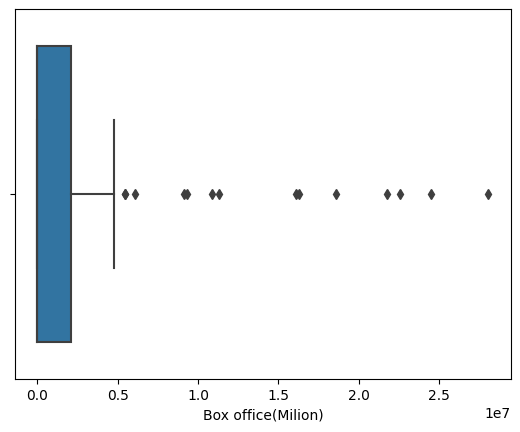

In [17]:
#step 8: Identify the variables that can affect the Success Result(Sucess_Category) to be high, mid or Flope.

# Check the column names in the DataFrame

print(df.columns)

# Visualize the data to identify outliers
# For example, let's visualize the 'Box office(Milion)' column

sns.boxplot(x=df['Box office(Milion)'])
plt.show()

In [19]:
#step 8: Identify the variables that can affect the Success Result(Sucess_Category) to be high, mid or Flope.
# Check the column names in the DataFrame

print(df.columns)

Index(['Unnamed: 0', 'movie_name', 'Produced by', 'Music by',
       'Productioncompany', 'Running time', 'Country', 'Language',
       'Budget(Milion)', 'Box office(Milion)', 'SuccessCategory'],
      dtype='object')


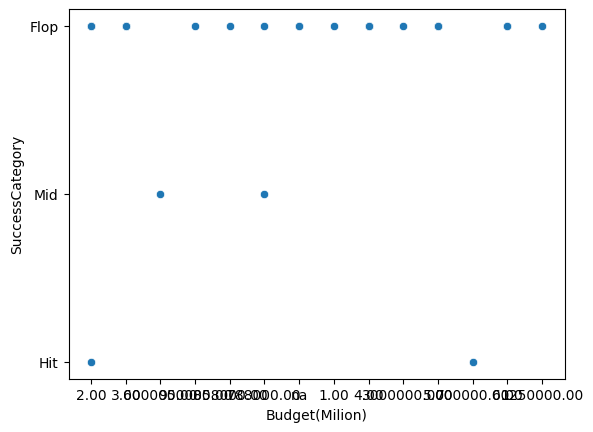

In [20]:
# Example scatter plot for 'Budget(Milion)' vs 'SuccessCategory'
sns.scatterplot(x='Budget(Milion)', y='SuccessCategory', data=df)
plt.show()

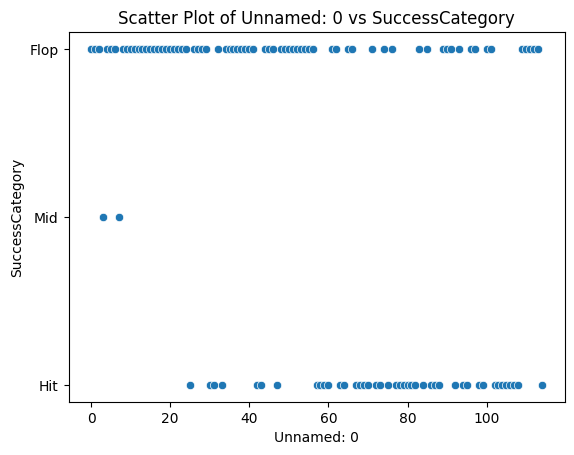

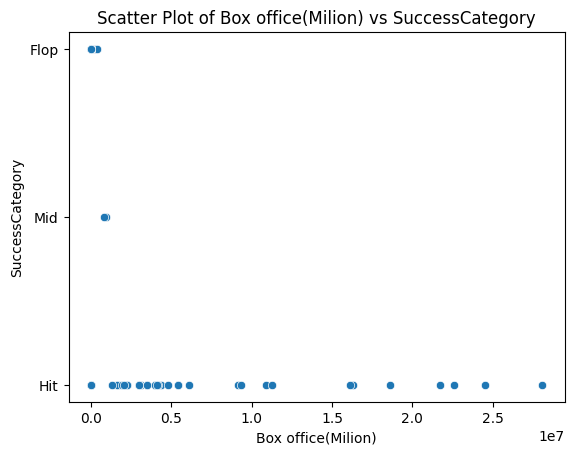

In [23]:
# Get numeric columns (excluding 'SuccessCategory')

numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Loop through numeric columns and create scatter plots

for column in numeric_columns:
    # Create scatter plot
    sns.scatterplot(x=column, y='SuccessCategory', data=df)
    plt.title(f'Scatter Plot of {column} vs SuccessCategory')
    plt.xlabel(column)
    plt.ylabel('SuccessCategory')
    plt.show()